Hey this is Himanshu Nanda, this python notebook is about image classification.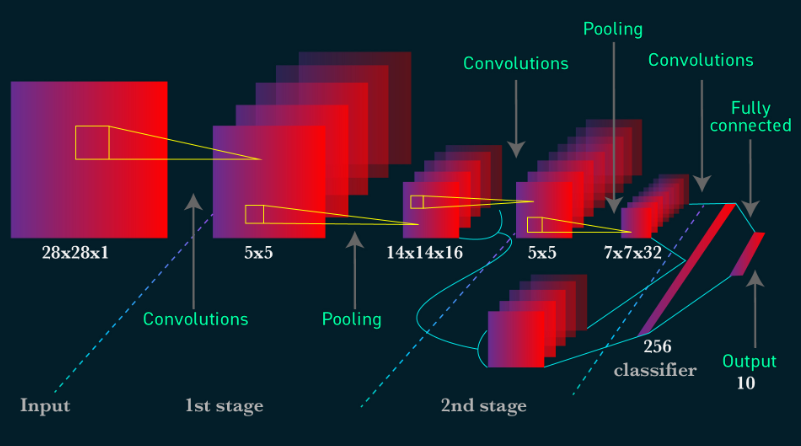

Image-src-https://analyticsindiamag.com/convolutional-neural-network-image-classification-overview/

Set-up and installing dependencies. Installing tensorflow itself would be sufficient since tensorflow-gpu and tensorflow are the same package since the release of version 2.1. Installing tensorflow alone will enable GPU acceleration.

In [5]:
!pip install tensorflow

In [6]:
!pip install opencv-python matplotlib

In [7]:
!pip list   #checking the list of libraries installed

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.1
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [128]:
import tensorflow as tf
import os

Checking the list of GPU's available.


In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [11]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Reslving OOM Erros before hand.

In [35]:
#Out Of Memory(OOM) Error exception. Usually, this error is thrown when there is insufficient space to allocate an object in the heap.
#Here we are avoiding OOM Errors,by setting up GPU Memory Consumption Growth.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
# we are not using all of the memory keeping to what is needed and not firing up the CPU!

Removing miss labelled, miss informative also known as dodgy images.

In [36]:
import cv2
import imghdr #this will allow to check the file extensions for ou particular images
from matplotlib import pyplot as plt

In [94]:
data_dir='/content/drive/MyDrive/Image Classification/dataset' #initialise the dataset to a variable

In [95]:
image_exts =['jpeg','jpg','bmp','png']

In [96]:
os.listdir(data_dir)

['happy', 'sad']

In [97]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad


In [98]:
for image in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image{}'.format(image_path))


Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector7.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector8.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector6.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector5.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector9.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector4.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/nav_logo321_hr.webp
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector3.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector2.svg
Image not in ext list/content/drive/MyDrive/Image Classification/dataset/sad/vector11.svg
Image not in 

Loading the dataset.

In [99]:
import numpy as np
from matplotlib import pyplot as plt

In [100]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Image Classification/dataset')

Found 87 files belonging to 2 classes.


In [101]:
data_iterator = data.as_numpy_iterator()

In [102]:
batch = data_iterator.next()

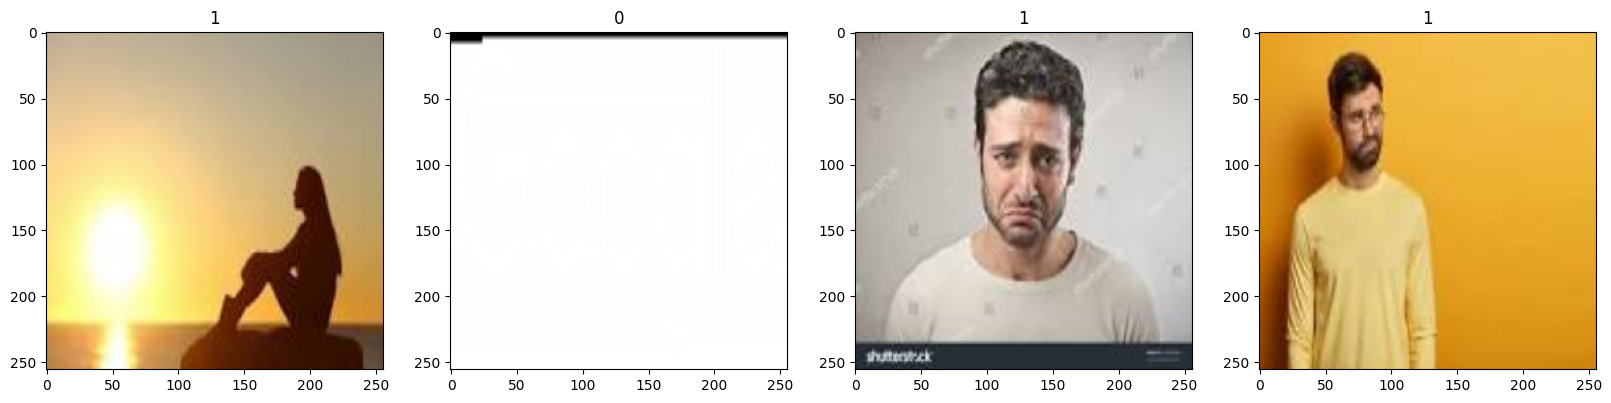

In [105]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocessing the dataset.

Scaling the dataset.....

In [106]:
data = data.map(lambda x,y:(x/255,y))

In [107]:
scaled_iterator = data.as_numpy_iterator()

In [108]:
batch = scaled_iterator.next()

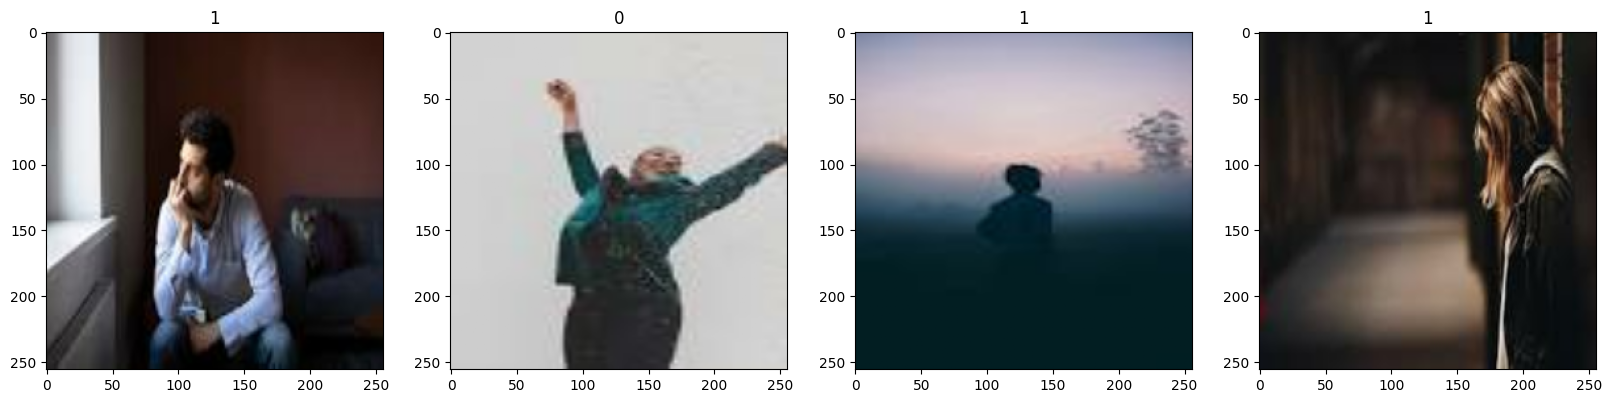

In [109]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitiing the dataset.....

In [112]:
len(data) #numbe of bacthes

3

In [118]:
train_size=int(len(data)*.6)
val_size =int(len(data)*.2)+1
test_size=int(len(data)*.2)+1

In [123]:
train_size+test_size+val_size

3

In [125]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [126]:
len(test)

1

Building Deep Learning Models

In [131]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [132]:
model = Sequential()

In [133]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [134]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

Training the model.

In [136]:
logsdir = '/content/drive/MyDrive/Image Classification/Untitled Folder'

In [137]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir)

In [139]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 13s 13s/step - loss: 0.7037 - accuracy: 0.3750 - val_loss: 5.6673 - val_accuracy: 0.5938
Epoch 2/20
1/1 [==============================] - 0s 397ms/step - loss: 5.5285 - accuracy: 0.5625 - val_loss: 1.9953 - val_accuracy: 0.5312
Epoch 3/20
1/1 [==============================] - 1s 531ms/step - loss: 1.9353 - accuracy: 0.5625 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 1s 522ms/step - loss: 0.6649 - accuracy: 0.5625 - val_loss: 0.6652 - val_accuracy: 0.5625
Epoch 5/20
1/1 [==============================] - 1s 517ms/step - loss: 0.6692 - accuracy: 0.5312 - val_loss: 0.6782 - val_accuracy: 0.4688
Epoch 6/20
1/1 [==============================] - 0s 441ms/step - loss: 0.7148 - accuracy: 0.3125 - val_loss: 0.6567 - val_accuracy: 0.6875
Epoch 7/20
1/1 [==============================] - 0s 408ms/step - loss: 0.6691 - accuracy: 0.5625 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 8/20
1/1 [=====

Plot Performance

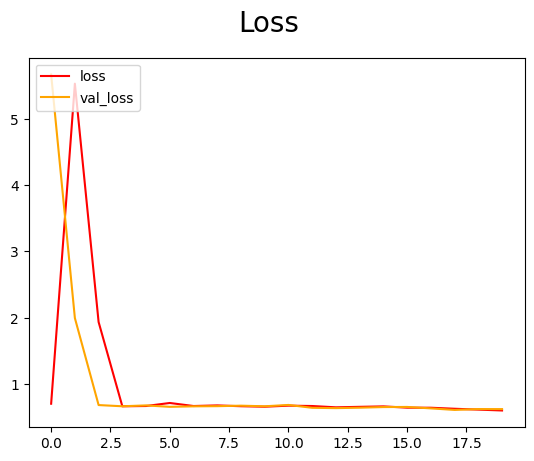

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluations....

In [143]:
from tensorflow import keras
from keras.metrics import Precision, Recall, BinaryAccuracy

In [144]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [146]:
for batch in test.as_numpy_iterator():
  X,y =batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 64ms/step


In [151]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.8888888955116272,Accuracy:0.95652174949646


Testing the model

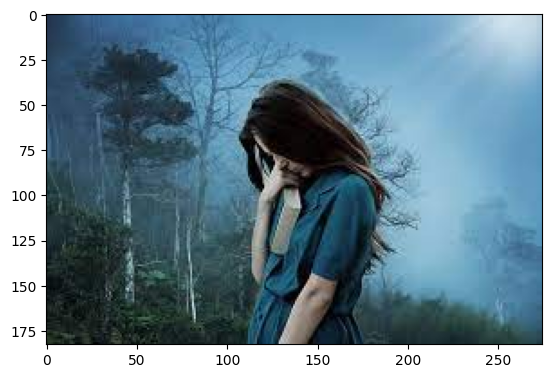

In [166]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Image Classification/test/a.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

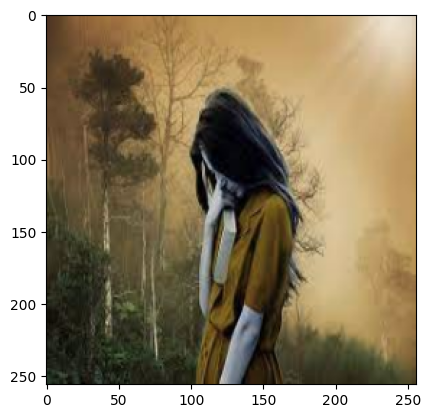

In [167]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [168]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 20ms/step


In [169]:
yhat

array([[0.5124416]], dtype=float32)

In [170]:
if yhat < 0.52:
  print(f'Class is Sad')
else:
  print(f'Class is Happy')

Class is Sad


Saving the model


In [171]:
from tensorflow import keras
from keras.models import load_model

In [172]:
model.save(os.path.join('models','happysadmodel.h5'))

In [173]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [174]:
yhatnew = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 21ms/step


In [175]:
if yhatnew < 0.52:
  print(f'Class is Sad')
else:
  print(f'Class is Happy')

Class is Sad
